In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load data
memory_capacity = np.load("data/mccoef_mc_relu.npy") # shape = [points, trial, max_leadout]
coef = np.load("data/mccoef_coef_relu.npy") # shape = [points, trial]
params = np.load("data/mccoef_params_relu.npy") # shape = [points, 3(g, sigma_s, sigma_n)]

N = 10000
points = memory_capacity.shape[0]
trial = memory_capacity.shape[1]
max_leadout = memory_capacity.shape[2]

In [3]:
# calculating Lhalf

Lhalf_list = np.zeros([points, trial])

for num in range(points):
    mcs = memory_capacity[num]
    meancoef = np.mean(coef[num])
    mc1 = np.mean(mcs[:,0]) #trial average
    div = mc1*np.ones([trial,1])@(np.arange(1,max_leadout+1).reshape(1,-1))
    ratios = mcs/div 
    
    #calc Lhalf
    for i in range(trial):
        for j in range(1,max_leadout):
            if ratios[i,j] < 0.5:
                break
        Lhalf_list[num, i] = j+1

In [4]:
Lhalf_mean = np.mean(Lhalf_list, axis=1)
Lhalf_std = np.std(Lhalf_list, axis=1)
coef_mean = np.mean(coef, axis=1)
coef_std = np.std(coef, axis=1)

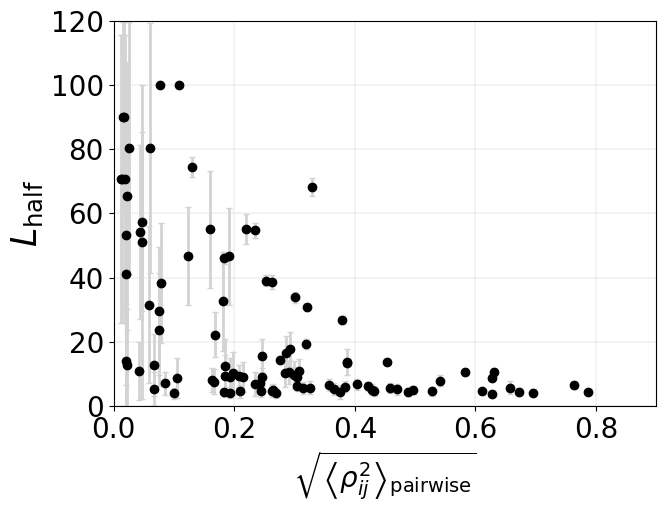

In [7]:
fig = plt.figure(figsize=(7,5))
plt.errorbar(coef_mean, Lhalf_mean, xerr=coef_std, yerr=Lhalf_std, fmt="o", capsize=2, color="k", elinewidth=2, ecolor="lightgray")
plt.xlabel(r"$\sqrt{ \left\langle \rho_{ij}^2 \right\rangle_{\rm pairwise} }$", size=20)
plt.ylabel(r"$L_{\rm{half}}$",fontsize=25)
plt.tick_params(labelsize=20) 
plt.grid(linewidth=0.2)
plt.ylim(0,120)
plt.xlim(0,0.9)
plt.show()

In [6]:
# Statistical test for Pearson's r between log(√<rho^2>) and log(Lhalf)

from scipy.stats import pearsonr

X = np.log(coef_mean)
Y = np.log(Lhalf_mean)

correlation, p_value = pearsonr(X, Y)

print(f"Pearson's r ={ correlation } (p value={p_value})")

Pearson's r =-0.6401238918167634 (p value=7.470667701692118e-13)
